# Explore the reference network


- [Crossref](https://www.crossref.org/) provides an API to get the references of a publication ([rest-api-doc](https://github.com/CrossRef/rest-api-doc)).


- Go down the references for a fixed number of steps (for example 3), then keep only the articles which have been visited more than N times (for examples 3 times), and draw the upward graph starting from these articles. 

## To do:
- resolve identical label
- stats:  n ref vs n citation, review vs foundational

- disconnected component for the 1st generation references: coloring 

- use 'store' from scopus manual export + [query ref resolver](https://www.crossref.org/labs/resolving-citations-we-dont-need-no-stinkin-parser/)





In [1]:
#%load_ext autoreload
#%autoreload 2

import crossrefexp as exp

In [2]:
# Create the interface to acces metadata
store = exp.MetaDataStore()

44 metadata loaded from `data/cachefile.pickle`


In [3]:
store.reset()

Delete `data/cachefile.pickle` 0.19 Mo, 
 Are you sure? [type yes] 
canceled


In [4]:
metadata = store.get( '10.1016/j.commatsci.2018.04.065' )
metadata.printinfo()

(2018) Plastic flow and dislocation strengthening in a dislocation density based f...
   M. Sudmanns et al. - Computational Materials Science
   http://dx.doi.org/10.1016/j.commatsci.2018.04.065


In [15]:
# Create a reference graph starting at the given DOI:
gr = exp.ReferenceGraph( '10.1063/1.3284082' )
gr

{'10.1063/1.3284082': {'citedBy': [], 'gen': 0}}

In [7]:
# Expand the graph for N-generation
store.grow( gr, N=1 )

  0/32:   1/32:   2/32:   3/32:   4/32:   5/32:   6/32:   7/32:   8/32:   9/32:  10/32:  11/32:  12/32:  13/32:  14/32:  15/32:  16/32:  17/32:  18/32:  19/32:  20/32:  21/32:  22/32:  23/32:  24/32:  25/32:  26/32:  27/32:  28/32:  29/32:  30/32:  31/32: - done -            
160 nodes in the graph. The last generation number is 2.


In [8]:
from graphviz import Digraph

In [9]:
# Build the upward graph starting from the top-N cited articles
nodes, links = gr.upward_graph(15)
remaining_links = exp.filter_double_links( links )

no_weight_links = [ link for link in links if link not in remaining_links ]

def getlabel(doi):
    return store.get(doi).label()

color_list = ['red', 'gold1', 'cyan3', 'darkorchid2', 'chartreuse2']
def getcolor(doi):
    return color_list[ gr[doi]['gen'] ]

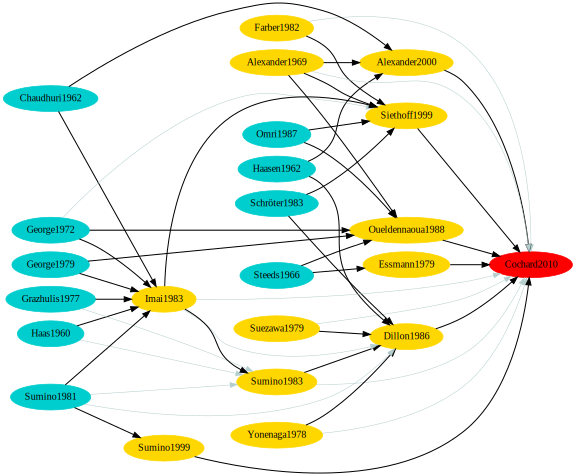

In [10]:
exp.built_graphviz( nodes, remaining_links, getlabel, getcolor, secondary_links=no_weight_links )

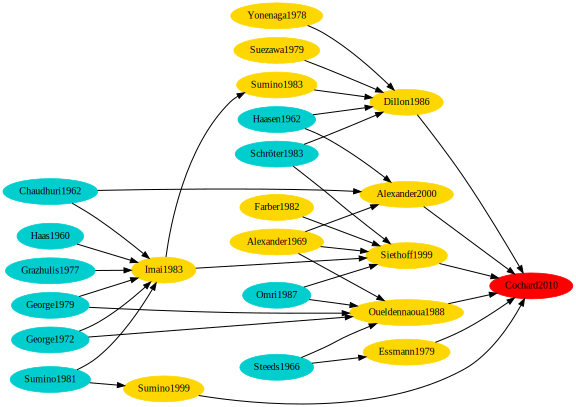

In [13]:
remaining_links = exp.filter_double_links( links )
exp.built_graphviz( nodes, remaining_links, getlabel, getcolor )

In [14]:
for doi, citedby_count in gr.most_cited()[:10]:
    print( getlabel(doi), citedby_count, store.get(doi)['URL'])

Imai1983 4 http://dx.doi.org/10.1080/01418618308245248
Alexander1969 4 http://dx.doi.org/10.1016/s0081-1947(08)60031-4
Sumino1981 4 http://dx.doi.org/10.1080/01418618108235812
George1972 3 http://dx.doi.org/10.1002/pssb.2220530209
Schröter1983 2 http://dx.doi.org/10.1063/1.332816
Yonenaga1978 2 http://dx.doi.org/10.1002/pssa.2210500239
Steeds1966 2 http://dx.doi.org/10.1098/rspa.1966.0139
George1979 2 http://dx.doi.org/10.1002/pssa.2210530216
Grazhulis1977 2 http://dx.doi.org/10.1002/pssa.2210430206
Omri1987 2 http://dx.doi.org/10.1080/01418618708214371
